In [1]:
import os
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def create_boxplots_from_df(df):
    num_cols = 2
    num_features = df.shape[1]
    num_rows = (num_features + 1) // num_cols
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 10))
    axs = axs.flatten()
    for i, feature in enumerate(df.columns):
        sns.boxplot(x=df[feature], ax=axs[i]) 
        axs[i].set_title("Boxplot of " + feature)
    for i in range(num_features, num_rows * num_cols):
        fig.delaxes(axs[i])
    plt.tight_layout()
    plt.show()

def show_countplots_by_target(df, columns, target_column_name):
    num_cols = 2
    num_features = len(columns)
    num_rows = (num_features + 1) // num_cols
    num_cols = 2
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 10))
    axs = axs.flatten()
    # Use a for loop to loop over each feature and create a countplot
    for i, feature in enumerate(columns):
        sns.countplot(x=feature, data=df, hue=target_column_name, ax=axs[i])
        axs[i].set_title(f"Countplot of {feature} by {target_column_name}")
        axs[i].set_ylabel('')
    for i in range(num_features, num_rows * num_cols):
        fig.delaxes(axs[i])
    plt.tight_layout()
    plt.show()

In [2]:
if not os.path.exists("./data_validation.csv"):
    data_frame = pd.read_csv("../../dataset/data-ori.csv")
    df_train, df_validation = train_test_split(
        data_frame,
        test_size=0.10,
        stratify=data_frame['SOURCE'],
    )
    
    df_train.to_csv("./data_train.csv", index=False)
    df_validation.to_csv("./data_validation.csv", index=False)

In [3]:
df_numerical=df_validation.loc[:,['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE', 'THROMBOCYTE', 'MCH', 'MCHC', 'MCV', 'AGE']]
df_categorical=df_validation.loc[:,['SEX','SOURCE']]

print("Data set shape: ",df_validation.shape)
print("Number of Duplicates: ",df_validation.duplicated().sum())
print("Nmber of NaN:", df_validation.isna().sum().sum())
print("\nData Info:")
df_validation.info()
print("\nData Head:")
df_validation.head()

Data set shape:  (442, 11)
Number of Duplicates:  0
Nmber of NaN: 0

Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 442 entries, 3108 to 3209
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HAEMATOCRIT   442 non-null    float64
 1   HAEMOGLOBINS  442 non-null    float64
 2   ERYTHROCYTE   442 non-null    float64
 3   LEUCOCYTE     442 non-null    float64
 4   THROMBOCYTE   442 non-null    int64  
 5   MCH           442 non-null    float64
 6   MCHC          442 non-null    float64
 7   MCV           442 non-null    float64
 8   AGE           442 non-null    int64  
 9   SEX           442 non-null    object 
 10  SOURCE        442 non-null    object 
dtypes: float64(7), int64(2), object(2)
memory usage: 41.4+ KB

Data Head:


,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
3108,30.2,9.9,3.44,6.1,486,28.8,32.8,87.8,61,M,in
2666,42.0,13.7,4.67,8.7,143,29.3,32.6,89.9,55,M,out
3791,31.7,10.5,3.84,15.1,45,27.3,33.1,82.6,71,M,in
505,42.0,14.3,4.96,14.3,216,28.8,34.0,84.7,20,F,out
4150,31.9,10.3,3.29,8.8,233,31.3,32.3,97.0,79,F,out


In [4]:
df_validation.nunique().to_frame('Unqiue Values')

,Unqiue Values
HAEMATOCRIT,196
HAEMOGLOBINS,95
ERYTHROCYTE,229
LEUCOCYTE,156
THROMBOCYTE,268
MCH,111
MCHC,61
MCV,196
AGE,87
SEX,2


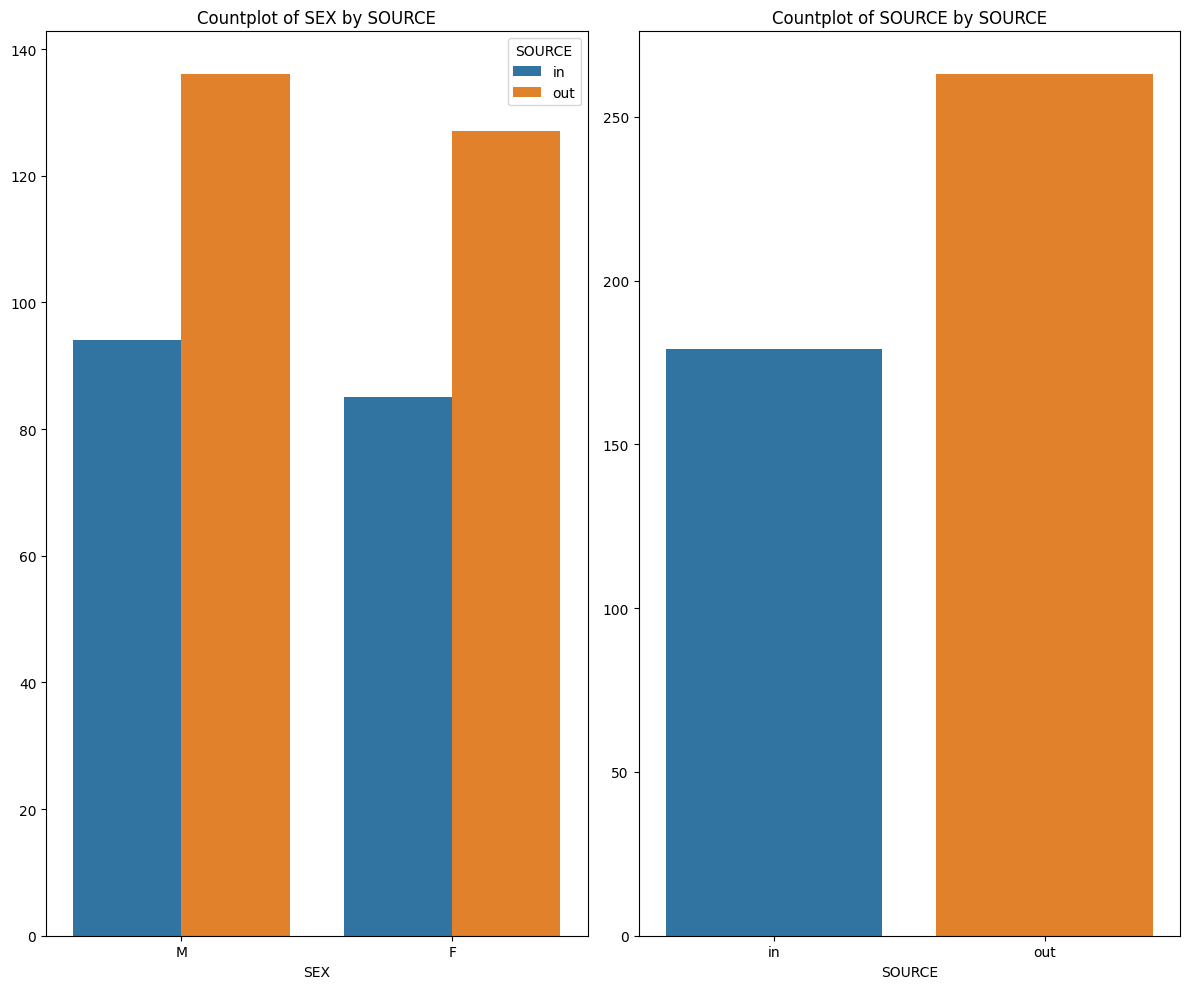

In [5]:
show_countplots_by_target(df_categorical, df_categorical.columns, "SOURCE")

In [6]:
df_numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
HAEMATOCRIT,442.0,38.142308,6.017751,13.70,34.10,38.500,42.2750,58.10
HAEMOGLOBINS,442.0,12.746606,2.104094,4.40,11.40,12.800,14.2000,18.90
ERYTHROCYTE,442.0,4.540633,0.758871,1.48,4.11,4.615,5.0375,7.05
LEUCOCYTE,442.0,8.399548,4.818713,1.30,5.30,7.300,9.7750,30.80
THROMBOCYTE,442.0,253.183258,119.375930,15.00,179.25,253.000,317.0000,1183.00
MCH,442.0,28.214253,2.617757,17.90,27.00,28.700,29.8000,40.80
MCHC,442.0,33.397285,1.240836,27.80,32.80,33.500,34.2000,39.00
MCV,442.0,84.428507,6.676326,62.70,81.10,85.200,88.5750,115.60
AGE,442.0,45.540724,21.476337,1.00,29.00,46.000,62.0000,92.00


array([[<Axes: title={'center': 'HAEMATOCRIT'}>,
        <Axes: title={'center': 'HAEMOGLOBINS'}>,
        <Axes: title={'center': 'ERYTHROCYTE'}>],
       [<Axes: title={'center': 'LEUCOCYTE'}>,
        <Axes: title={'center': 'THROMBOCYTE'}>,
        <Axes: title={'center': 'MCH'}>],
       [<Axes: title={'center': 'MCHC'}>,
        <Axes: title={'center': 'MCV'}>, <Axes: title={'center': 'AGE'}>]],
      dtype=object)

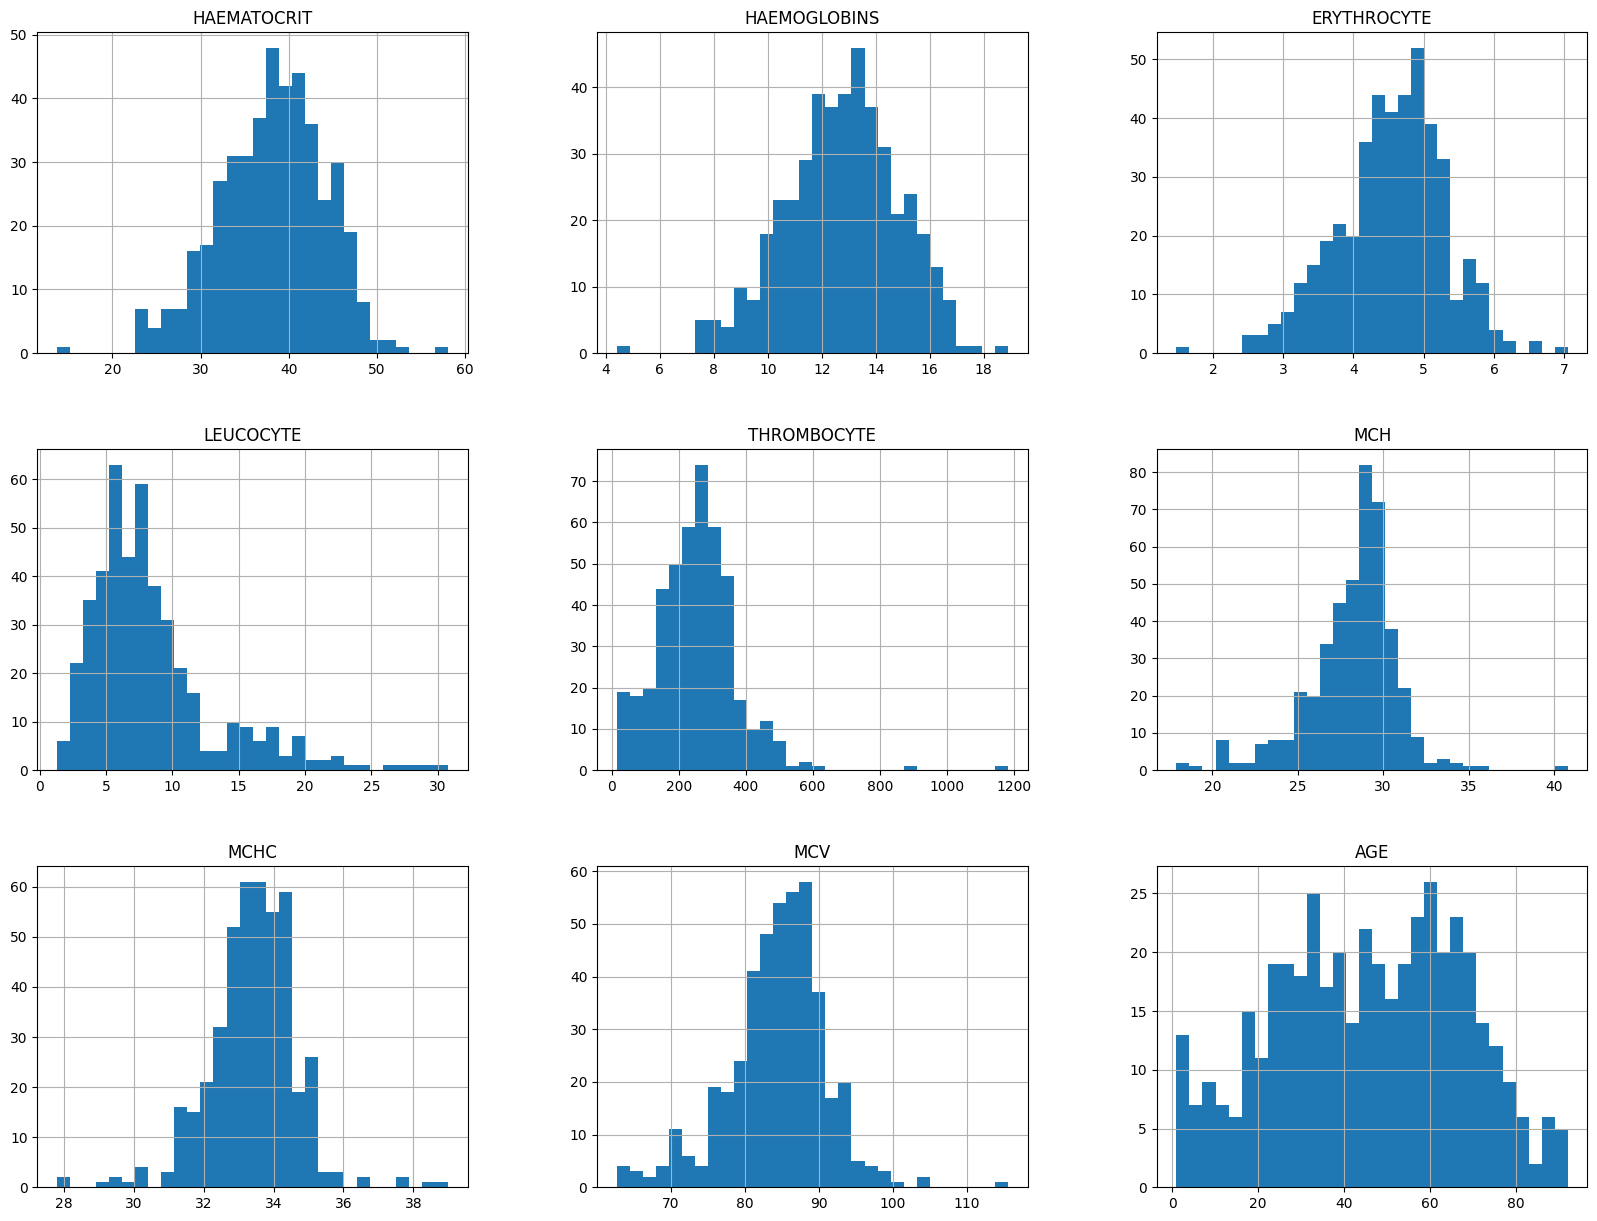

In [7]:
df_numerical.hist(bins=30, figsize=(20,15))

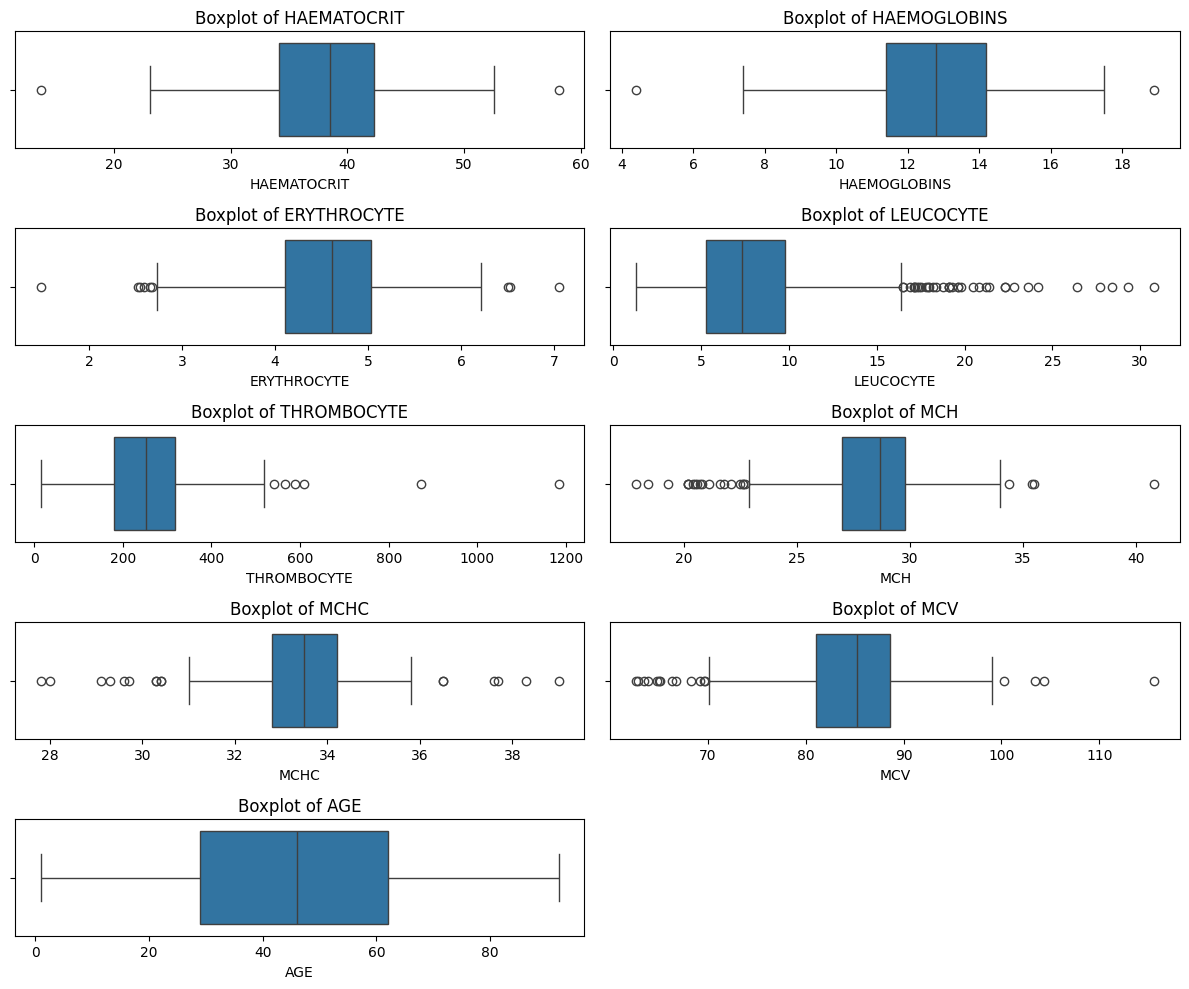

In [8]:
create_boxplots_from_df(df_numerical)

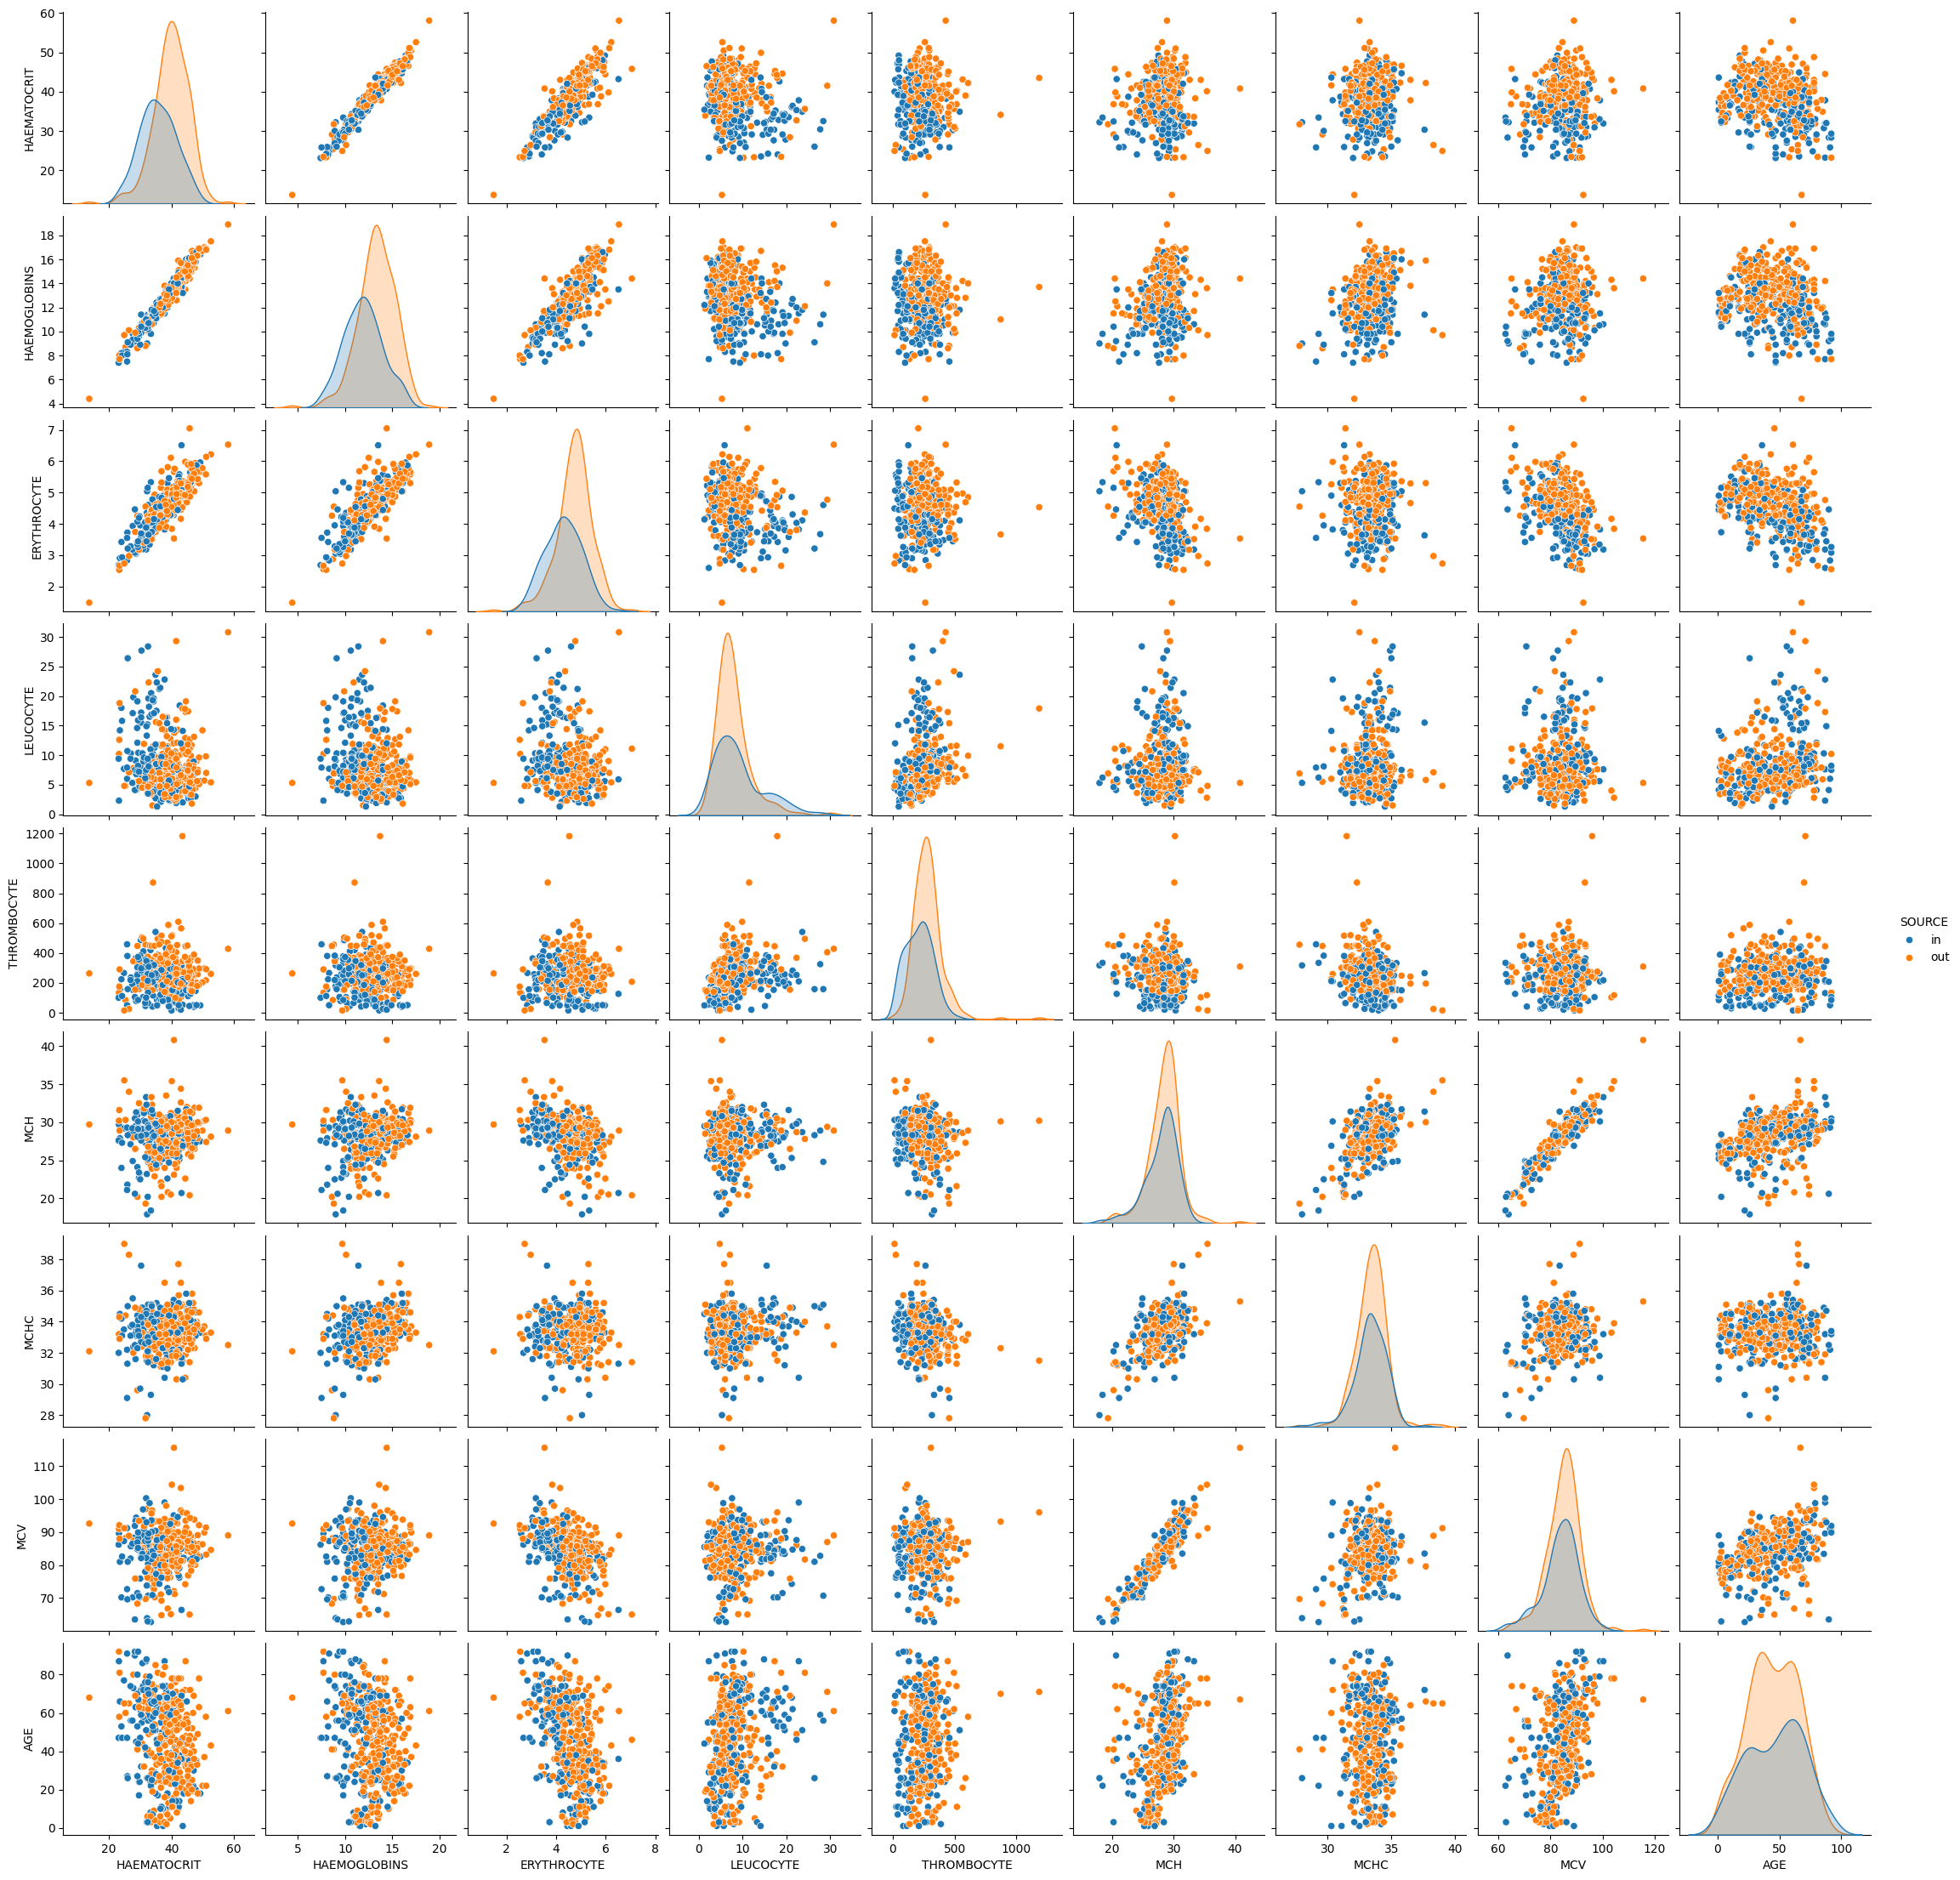

In [9]:
sns.pairplot(df_validation, hue='SOURCE')

In [10]:
numerical_correlation_mt = df_numerical.corr()
numerical_correlation_mt

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE
HAEMATOCRIT,1.000000,0.976813,0.879423,-0.179351,0.000084,0.115281,0.091887,0.095505,-0.242820
HAEMOGLOBINS,0.976813,1.000000,0.835098,-0.162872,-0.051816,0.230778,0.299411,0.137347,-0.224455
ERYTHROCYTE,0.879423,0.835098,1.000000,-0.185067,-0.009620,-0.332331,-0.032209,-0.381488,-0.406555
LEUCOCYTE,-0.179351,-0.162872,-0.185067,1.000000,0.301733,0.034515,0.066670,0.019127,0.269296
THROMBOCYTE,0.000084,-0.051816,-0.009620,0.301733,1.000000,-0.092118,-0.250823,0.006413,0.097967
MCH,0.115281,0.230778,-0.332331,0.034515,-0.092118,1.000000,0.571756,0.925427,0.360558
MCHC,0.091887,0.299411,-0.032209,0.066670,-0.250823,0.571756,1.000000,0.221193,0.040601
MCV,0.095505,0.137347,-0.381488,0.019127,0.006413,0.925427,0.221193,1.000000,0.408080
AGE,-0.242820,-0.224455,-0.406555,0.269296,0.097967,0.360558,0.040601,0.408080,1.000000


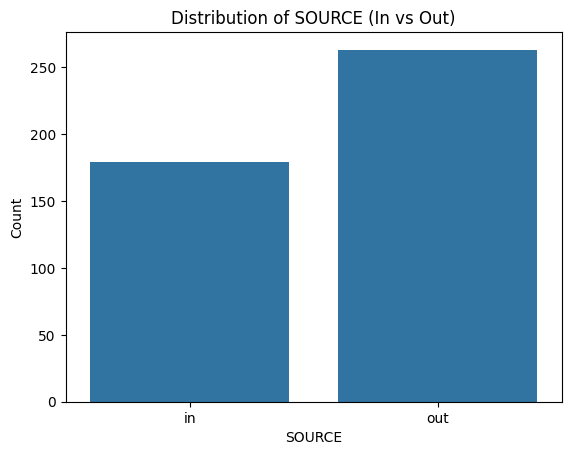

In [11]:
sns.countplot(x=df_validation['SOURCE'])
plt.title("Distribution of SOURCE (In vs Out)")
plt.xlabel("SOURCE")
plt.ylabel("Count")
plt.show()

In [12]:
source_counts = df_validation['SOURCE'].value_counts()
source_proportions = df_validation['SOURCE'].value_counts(normalize=True)
print("Counts of 'SOURCE':\n", source_counts)
print("\nProportions of 'SOURCE':\n", source_proportions)

Counts of 'SOURCE':
 SOURCE
out    263
in     179
Name: count, dtype: int64

Proportions of 'SOURCE':
 SOURCE
out    0.595023
in     0.404977
Name: proportion, dtype: float64
